In [7]:
#아이리스 품종 구별
#다중 분류활용

import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

#데이터 입력
df = pd.read_csv('../../dataset/iris.csv', names = ["sepal_length","sepal_width", "petal_length", "peltal_width", "species"])
print(df.head())


   sepal_length  sepal_width  petal_length  peltal_width      species
0           5.1          3.5           1.4           0.2  Iris-setosa
1           4.9          3.0           1.4           0.2  Iris-setosa
2           4.7          3.2           1.3           0.2  Iris-setosa
3           4.6          3.1           1.5           0.2  Iris-setosa
4           5.0          3.6           1.4           0.2  Iris-setosa


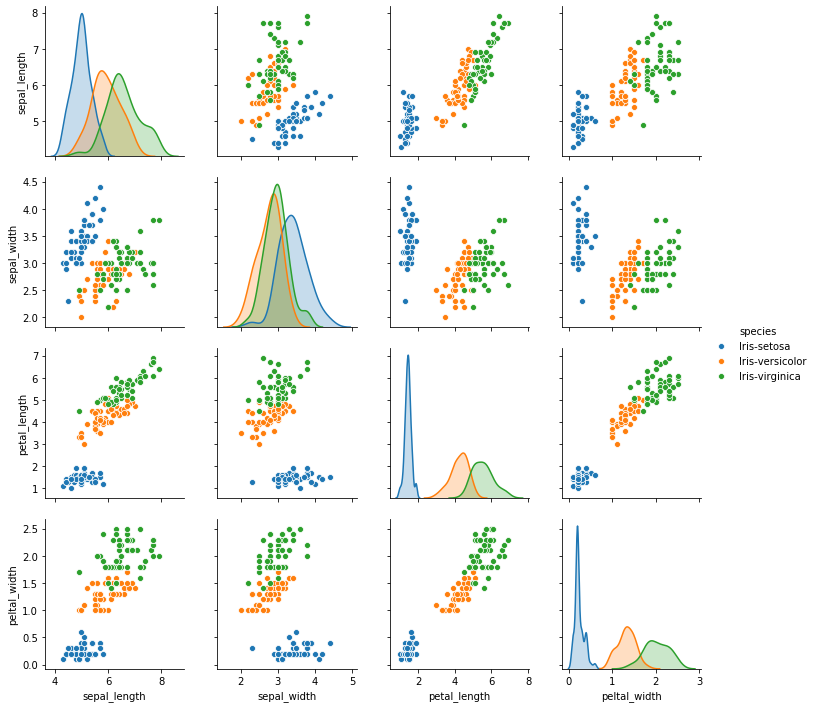

In [8]:
#그래프로 데이터 확인
sns.pairplot(df, hue='species');
plt.show()

In [14]:
#데이터 분류
dataset = df.values
x = dataset[:,0:4].astype(float)
y_obj = dataset[:,4]

#문자열 => 숫자형태로 변환
#array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
#array([1,2,3])
e = LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

#원 핫 인코딩
#0,1로만 이루어진 형태
#array([1,2,3])
#array([1.,0.,0.],[0.,1.,0.],[0.,0.,1.])
y_encoded = tf.keras.utils.to_categorical(y)


In [15]:
#모델설정
model = Sequential()
model.add(Dense(16,input_dim = 4,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [16]:
#모델컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
#모델 실행

model.fit(x, y_encoded, epochs=50, batch_size=1)

Train on 150 samples
Epoch 1/50
150/150 [==============================] - 1s 4ms/sample - loss: 1.2541 - accuracy: 0.3733
Epoch 2/50
150/150 [==============================] - 0s 849us/sample - loss: 0.9932 - accuracy: 0.4200
Epoch 3/50
150/150 [==============================] - 0s 863us/sample - loss: 0.7919 - accuracy: 0.6400
Epoch 4/50
150/150 [==============================] - 0s 867us/sample - loss: 0.6278 - accuracy: 0.8467
Epoch 5/50
150/150 [==============================] - 0s 913us/sample - loss: 0.5272 - accuracy: 0.9067
Epoch 6/50
150/150 [==============================] - 0s 859us/sample - loss: 0.4574 - accuracy: 0.9267
Epoch 7/50
150/150 [==============================] - 0s 870us/sample - loss: 0.4127 - accuracy: 0.9333
Epoch 8/50
150/150 [==============================] - 0s 858us/sample - loss: 0.3813 - accuracy: 0.9267
Epoch 9/50
150/150 [==============================] - 0s 860us/sample - loss: 0.3491 - accuracy: 0.9400
Epoch 10/50
150/150 [========================

In [18]:
#결과 출력
print("\n Accuracy : %.4f" % (model.evaluate(x,y_encoded)[1]))

150/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================